<a href="https://colab.research.google.com/github/tawaqalt/arbritrary/blob/master/Tawakalitu_Yusuf__Natural_language_processing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar zxf aclImdb_v1.tar.gz
!rm -rf aclImdb/train/unsup
!cat aclImdb/README

--2024-07-26 10:24:00--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  11.4MB/s    in 6.1s    

2024-07-26 10:24:06 (13.2 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an a

In [2]:
from sklearn.datasets import load_files
train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
print(train_review.target_names)

['neg', 'pos']


In [3]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [4]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out()) # Use get_feature_names_out()
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [11]:
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out()) # Use get_feature_names_out() instead of get_feature_names()
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


## [Problem 1] Scratch implementation of BoW

- 1-gram

In [16]:
first = 'This movie is SOOOO funny!!!'.split()
second = 'What a movie! I never'.split()
third = 'best movie ever!!!!! this movie'.split()

first = [s.lower().replace('!', '') for s in first]
second = [s.lower().replace('!', '') for s in second]
third = [s.lower().replace('!', '') for s in third]

gram_1_all = first + second + third

In [17]:
gram_1 = pd.DataFrame(np.zeros((3, len(set(gram_1_all)))).astype('int'),
                     columns=list(set(gram_1_all))) # Convert set to list

gram_1_list = [first, second, third]
for i, ss in enumerate(gram_1_list):
    for s in ss:
        n = ss.count(s)
        gram_1[s][i] = n

gram_1

,funny,soooo,what,a,ever,best,this,is,movie,i,never
0,1,1,0,0,0,0,1,1,1,0,0
1,0,0,1,1,0,0,0,0,1,1,1
2,0,0,0,0,1,1,1,0,2,0,0


- 2-gram

In [18]:
gram_2_all  = []
gram_2_list = []
for s in gram_1_list:
    lis = []
    for i in range(len(s)-1):
        gram_2_all.append(f'{s[i]} {s[i+1]}')
        lis.append(f'{s[i]} {s[i+1]}')

    gram_2_list.append(lis)

In [20]:
gram_2 = pd.DataFrame(np.zeros((3, len(set(gram_2_all)))).astype('int'),
                     columns=list(set(gram_2_all))) # Convert set to list

for i, ss in enumerate(gram_2_list):
    for s in ss:
        n = ss.count(s)
        gram_2[s][i] = n

gram_2

,ever this,what a,best movie,movie is,i never,this movie,soooo funny,movie i,movie ever,is soooo,a movie
0,0,0,0,1,0,1,1,0,0,1,0
1,0,1,0,0,1,0,0,1,0,0,1
2,1,0,1,0,0,1,0,0,1,0,0


from matplotlib import pyplot as plt
gram_2['ever this'].plot(kind='hist', bins=20, title='ever this')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
gram_2['what a'].plot(kind='hist', bins=20, title='what a')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
gram_2['best movie'].plot(kind='hist', bins=20, title='best movie')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
gram_2['movie is'].plot(kind='hist', bins=20, title='movie is')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
gram_2.plot(kind='scatter', x='ever this', y='what a', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
gram_2.plot(kind='scatter', x='what a', y='best movie', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
gram_2.plot(kind='scatter', x='best movie', y='movie is', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
gram_2.plot(kind='scatter', x='movie is', y='i never', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ever this']
  ys = series['what a']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = gram_2.sort_values('ever this', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ever this')
_ = plt.ylabel('what a')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ever this']
  ys = series['movie is']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = gram_2.sort_values('ever this', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ever this')
_ = plt.ylabel('movie is')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ever this']
  ys = series['i never']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = gram_2.sort_values('ever this', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ever this')
_ = plt.ylabel('i never')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ever this']
  ys = series['this movie']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = gram_2.sort_values('ever this', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ever this')
_ = plt.ylabel('this movie')

from matplotlib import pyplot as plt
gram_2['ever this'].plot(kind='line', figsize=(8, 4), title='ever this')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
gram_2['what a'].plot(kind='line', figsize=(8, 4), title='what a')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
gram_2['best movie'].plot(kind='line', figsize=(8, 4), title='best movie')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
gram_2['movie is'].plot(kind='line', figsize=(8, 4), title='movie is')
plt.gca().spines[['top', 'right']].set_visible(False)

- TF-IDF

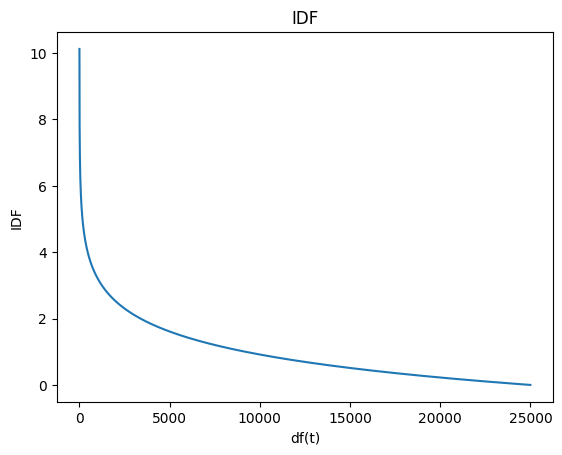

In [21]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

In [23]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()


df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)

,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [24]:
#NLTK
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words))

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out()) # Using get_feature_names_out()
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


## [Problem 2] TF-IDF calculation

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_train = TfidfVectorizer(stop_words=stop_words, max_features=5000)
X_train = (vectorizer_train.fit_transform(x_train))
vec = vectorizer_train.get_feature_names_out()

vectorizer_test = TfidfVectorizer(stop_words=stop_words,
                                  max_features=5000,
                                  vocabulary=vec)
X_test = vectorizer_test.fit_transform(x_test)
print(X_train.shape, X_test.shape)

(25000, 5000) (25000, 5000)


### Problem 3] Learning with TF-**IDF**

In [31]:
import lightgbm as lgb

lgb = lgb.LGBMClassifier().fit(X_train,y_train)
y_pred = lgb.predict(X_test)

[LightGBM] [Info] Number of positive: 12500, number of negative: 12500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.171556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 445520
[LightGBM] [Info] Number of data points in the train set: 25000, number of used features: 4998
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("{}".format(lgb.score(X_test, y_test)))
print("{}".format(precision_score(y_test,y_pred)))
print("{}".format(recall_score(y_test,y_pred)))
print("{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

0.8606
0.8523411240522161
0.87232
0.8622148420511604
[[10611  1889]
 [ 1596 10904]]


## Problem 4: Scratch mounting of TF-IDF

- Standard Formula

In [33]:
tf = gram_1.copy()
idf = gram_1.copy()

for i in range(len(tf)):
    tf.iloc[i, :] = tf.iloc[i, :] / tf.iloc[i, :].sum()

for t in idf.columns:
    idf[t][:] = np.log(len(idf.columns) / idf[t].sum())

<ipython-input-33-1ad2f6401ef7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf[t][:] = np.log(len(idf.columns) / idf[t].sum())
<ipython-input-33-1ad2f6401ef7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf[t][:] = np.log(len(idf.columns) / idf[t].sum())
<ipython-input-33-1ad2f6401ef7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf[t][:] = np.log(len(idf.columns) / idf[t].sum())
<ipython-input-33-1ad2f6401ef7>:8: Setti

In [34]:
tf

,funny,soooo,what,a,ever,best,this,is,movie,i,never
0,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.0,0.0
1,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.2
2,0.0,0.0,0.0,0.0,0.2,0.2,0.2,0.0,0.4,0.0,0.0


In [35]:
idf

,funny,soooo,what,a,ever,best,this,is,movie,i,never
0,2.397895,2.397895,2.397895,2.397895,2.397895,2.397895,1.704748,2.397895,1.011601,2.397895,2.397895
1,2.397895,2.397895,2.397895,2.397895,2.397895,2.397895,1.704748,2.397895,1.011601,2.397895,2.397895
2,2.397895,2.397895,2.397895,2.397895,2.397895,2.397895,1.704748,2.397895,1.011601,2.397895,2.397895


In [36]:
tf * idf

,funny,soooo,what,a,ever,best,this,is,movie,i,never
0,0.479579,0.479579,0.000000,0.000000,0.000000,0.000000,0.34095,0.479579,0.20232,0.000000,0.000000
1,0.000000,0.000000,0.479579,0.479579,0.000000,0.000000,0.00000,0.000000,0.20232,0.479579,0.479579
2,0.000000,0.000000,0.000000,0.000000,0.479579,0.479579,0.34095,0.000000,0.40464,0.000000,0.000000


- Formula adopted by scikit-learn

In [37]:
tf_2 = gram_1.copy()
idf_2 = gram_1.copy()

for t in idf.columns:
    idf_2[t][:] = np.log((1 + len(idf_2.columns)) / (1 + idf[t].sum())) + 1

<ipython-input-37-0802a47f657c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_2[t][:] = np.log((1 + len(idf_2.columns)) / (1 + idf[t].sum())) + 1
<ipython-input-37-0802a47f657c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_2[t][:] = np.log((1 + len(idf_2.columns)) / (1 + idf[t].sum())) + 1
<ipython-input-37-0802a47f657c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_2[t][:] = np.log((1 + len(idf_2.columns)) / (1 +

In [38]:
tf_2 * idf_2

,funny,soooo,what,a,ever,best,this,is,movie,i,never
0,1.381543,1.381543,0.000000,0.000000,0.000000,0.000000,1.674285,1.381543,2.089949,0.000000,0.000000
1,0.000000,0.000000,1.381543,1.381543,0.000000,0.000000,0.000000,0.000000,2.089949,1.381543,1.381543
2,0.000000,0.000000,0.000000,0.000000,1.381543,1.381543,1.674285,0.000000,4.179898,0.000000,0.000000


In [39]:
!pip install gensim

In [43]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]

model = Word2Vec(min_count=1, vector_size=10)
model.build_vocab(sentences)

model.train(sentences, total_examples=model.corpus_count, epochs=10)  # Train for 10 epochs
print("List of vocabulary: {}".format(model.wv.key_to_index.keys())) # Using key_to_index instead of vocab
for vocab in model.wv.key_to_index.keys(): # Using key_to_index instead of vocab
    print("Vector of {} : \n{}".format(vocab, model.wv[vocab]))

List of vocabulary: dict_keys(['very', 'bad', 'good', 'is', 'this', 'a', 'film', 'movie'])
Vector of very : 
[-0.00536227  0.00236431  0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458873  0.08972988 -0.05015428 -0.03763372]
Vector of bad : 
[ 0.07380505 -0.01533471 -0.04536613  0.06554051 -0.0486016  -0.01816018
  0.0287658   0.00991874 -0.08285215 -0.09448818]
Vector of good : 
[ 0.07311065  0.05070519  0.06759309  0.00761263  0.06350898 -0.03405724
 -0.0094533   0.05768519 -0.07522386 -0.03936936]
Vector of is : 
[-0.07511994 -0.00930093  0.09538642 -0.07319568 -0.02333897 -0.01937847
  0.0807788  -0.05931221  0.00045165 -0.04753995]
Vector of this : 
[-0.0960355   0.05007293 -0.08759586 -0.04391825 -0.000351   -0.00296181
 -0.0766124   0.09614743  0.04982058  0.09233143]
Vector of a : 
[-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]
Vector of film : 
[-0.01577198  0.00321244 -0.04143998 -0.07683337 -0

In [44]:
model.wv.most_similar(positive="good", topn=3)

[('movie', 0.4273821711540222),
 ('bad', 0.3293360769748688),
 ('very', 0.30043885111808777)]

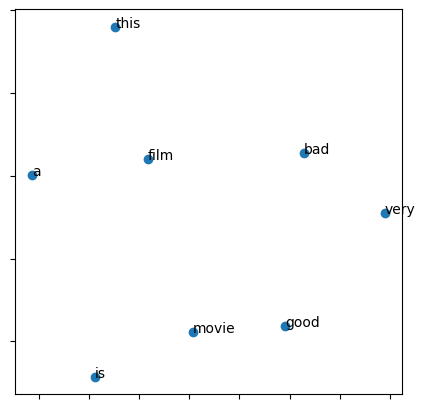

In [47]:
from sklearn.manifold import TSNE

vocabs = list(model.wv.key_to_index.keys())
# Lower perplexity to be less than number of vocabs
tsne_model = TSNE(perplexity=5, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model.wv[vocabs])

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

### Problem 5] Pre-processing of corpus

In [48]:
import re
for i, s in enumerate(x_train):
    if 'www' in s:
        print(i)
        print(s)
        break

38
I don't hand out "ones" often, but if there was ever a film that deserved this sort of attention, it's "Gas!" This is self-indulgent crap that reaches for some of the ambiance of M*A*S*H and falls completely flat on its face in the attempt.<br /><br />I see what Corman was going for - Malcolm Marmorstein and Elliott Gould tried to reproduce Gould's deathless role in the original movie version of M*A*S*H with a similar plot (in the movie "Whiffs" - look it up here in IMDb, http://www.imdb.com/title/tt0073891/ for more information).<br /><br />Marmorstein and Gould got closer to the brass ring with "Whiffs" than Corman did with "Gas!" but didn't quite get there. Neither one of those films even got close to the success of M*A*S*H.<br /><br />What's wrong with "Gas!"? What isn't? No one comes close to really acting at a level above junior high school theatrics. The production values stink. Someone else here mentioned the magically regenerating headlights on a getaway car, and there's mo

In [49]:
no_preprocessing = x_train[38]
after_preprocessing1 = re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-…]+', "", no_preprocessing)
after_preprocessing2 = re.sub(r'<[^>]+>', " ", after_preprocessing1)
after_preprocessing3 = re.sub(r"[^0-9a-zA-Z ]", "", after_preprocessing2)
after_preprocessing = after_preprocessing3.lower()
after_preprocessing

'i dont hand out ones often but if there was ever a film that deserved this sort of attention its gas this is selfindulgent crap that reaches for some of the ambiance of mash and falls completely flat on its face in the attempt  i see what corman was going for  malcolm marmorstein and elliott gould tried to reproduce goulds deathless role in the original movie version of mash with a similar plot in the movie whiffs  look it up here in imdb  for more information  marmorstein and gould got closer to the brass ring with whiffs than corman did with gas but didnt quite get there neither one of those films even got close to the success of mash  whats wrong with gas what isnt no one comes close to really acting at a level above junior high school theatrics the production values stink someone else here mentioned the magically regenerating headlights on a getaway car and theres more of that lack of attention to detail nothing works the way its supposed to in this film and nobody cares  gas actu

## Problem 6: Learning Word2Vec

In [51]:
model = Word2Vec(min_count=1, vector_size=10) # Use vector_size instead of size
model.build_vocab([after_preprocessing.split()]) # Word2Vec expects a list of sentences, each sentence being a list of words.
model.train([after_preprocessing.split()], total_examples=model.corpus_count, epochs=model.epochs) # Passing training data as a list of sentences

(819, 1490)

# [Problem 7] (Advance assignment) Vector Visualization

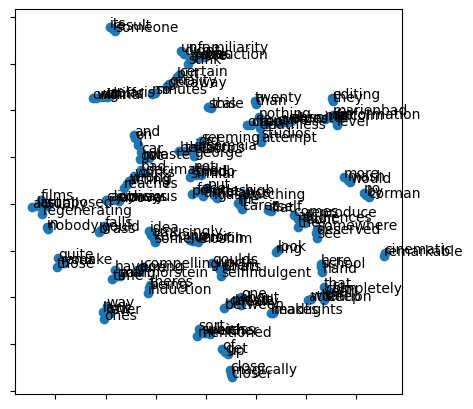

[('works', 0.750068724155426), ('role', 0.749907910823822), ('decimated', 0.7214104533195496), ('films', 0.7031644582748413), ('wrong', 0.6679612994194031)]


In [54]:
# Visualize the obtained vectors by t-SNE
vocabs = list(model.wv.key_to_index.keys())
tsne_model = TSNE(perplexity=2, n_components=2, init="pca", n_iter=3500, random_state=32)
vectors_tsne = tsne_model.fit_transform(model.wv[vocabs])

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

# Select some words and use wv.most_similar to find out which words are similar
print(model.wv.most_similar(positive="bad", topn=5))